# Sentiment Analysis on IMDB movie reviews

## Problem statement : The goal of this project is to build a machine learning model that can automatically classify IMDB movie reviews as positive or negative based on the text content.
This will involve cleaning and preprocessing the text data, transforming it into numerical features, and applying various machine learning algorithms to identify the most accurate model for sentiment classification.

## Objectives :
1. Perform data cleaning and text preprocessing using spaCy for lemmatization and stopword removal.

2. Explore and visualize sentiment distribution and common words for each sentiment category.

3. Convert text into numerical representations using TF-IDF Vectorization.

4. Train and evaluate multiple machine learning models.

5. Compare model performances and identify the best one for this dataset.

## Models Used :
1. Logistic Regression

2. Naive Bayes (MultinomialNB)

3. Linear Support Vector Machine (SVM)

4. Random Forest Classifier

## Evaluation Metrics:
1. Accuracy – Overall percentage of correct predictions.

2. Precision – Measure of how many predicted positives are actually positive.

3. Recall – Measure of how many actual positives were correctly predicted.

4. F1 Score – Harmonic mean of precision and recall for balanced evaluation.

5. Classification Report – Detailed breakdown of metrics per class.

In [70]:
#importing required libraries
import pandas as pd
import numpy as np
import re
import spacy
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
#ignore warnings
import warnings
warnings.filterwarnings("ignore")
#modelling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
#saving
import pickle

In [2]:
#load the dataset
imdb = pd.read_csv("C:\\Users\\aryas\\OneDrive\\Desktop\\imdb dataset\\IMDB Dataset.csv")

In [3]:
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
imdb.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
imdb.duplicated().sum()

np.int64(418)

In [7]:
imdb.drop_duplicates(inplace=True)

In [8]:
imdb.duplicated().sum()

np.int64(0)

In [9]:
imdb.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


### Text cleaning and normalization

In [10]:
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    # 1️⃣ Lowercase
    text = text.lower()
    
    # 2️⃣ Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # 3️⃣ Remove punctuation & non-alphabetic characters
    text = re.sub(r"[^a-z\s]", "", text)
    
    # 4️⃣ Process with spaCy
    doc = nlp(text)
    
    # 5️⃣ Remove stopwords & lemmatize
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    
    # 6️⃣ Join tokens back into a single string
    cleaned_text = " ".join(tokens)
    
    return cleaned_text


In [12]:
def clean_text_pipe(docs):
    for doc in nlp.pipe(docs, batch_size=50):
        tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
        yield " ".join(tokens)

imdb['cleaned_review'] = list(clean_text_pipe(imdb['review']))


In [13]:
imdb.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,reviewer mention watch Oz episode hook right e...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br filming techniq...
2,I thought this was a wonderful way to spend ti...,positive,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,negative,basically family little boy Jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Mattei love Time money visually stunnin...


### Working with the cleaned version after saving 

In [17]:
imdb_cleaned = pd.read_pickle("imdb_cleaned.pkl")

In [18]:
imdb_cleaned.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,reviewer mention watch Oz episode hook right e...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br filming techniq...
2,I thought this was a wonderful way to spend ti...,positive,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,negative,basically family little boy Jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Mattei love Time money visually stunnin...


In [19]:
#remove the uncleaned column
imdb_cleaned.drop(columns=["review"],inplace=True)
imdb_cleaned=imdb_cleaned[["cleaned_review","sentiment"]]

In [20]:
imdb_cleaned.head()

,cleaned_review,sentiment
0,reviewer mention watch Oz episode hook right e...,positive
1,wonderful little production br filming techniq...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically family little boy Jake think zombie ...,negative
4,Petter Mattei love Time money visually stunnin...,positive


### EDA

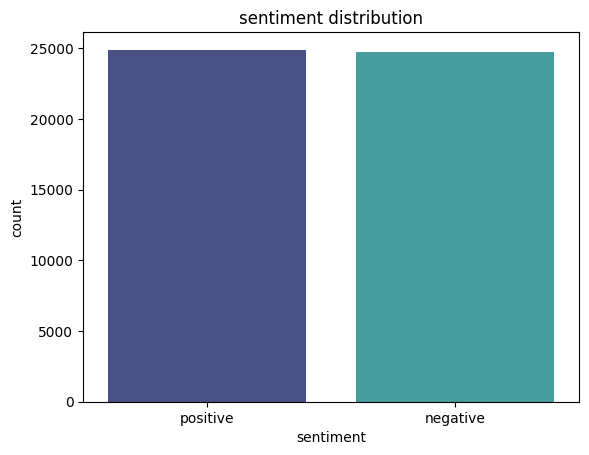

In [35]:
#sentiment distribution
sns.countplot(data = imdb_cleaned, x="sentiment",palette="mako")
plt.title("sentiment distribution")
plt.show();

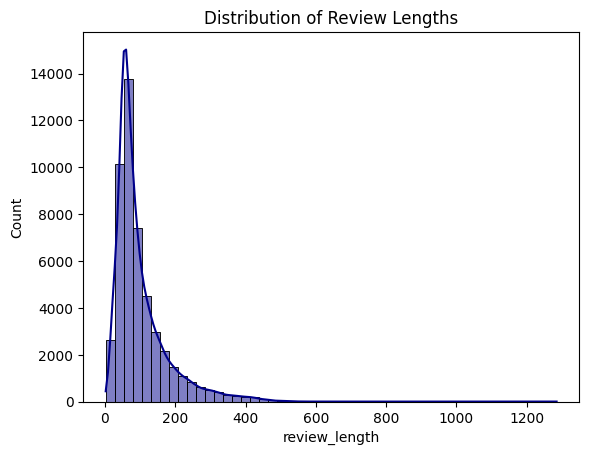

In [38]:
#review length analysis
imdb_cleaned['review_length'] = imdb_cleaned['cleaned_review'].apply(lambda x: len(x.split()))
sns.histplot(imdb_cleaned['review_length'], bins=50, kde=True, color="darkblue")
plt.title('Distribution of Review Lengths')
plt.show()

In [40]:
#word frequency (most common words per sentiment)
from collections import Counter

pos_words = " ".join(imdb_cleaned[imdb_cleaned['sentiment']=='positive']['cleaned_review']).split()
neg_words = " ".join(imdb_cleaned[imdb_cleaned['sentiment']=='negative']['cleaned_review']).split()

print("Most common positive words:", Counter(pos_words).most_common(10))
print("Most common negative words:", Counter(neg_words).most_common(10))

Most common positive words: [('film', 48825), ('movie', 43203), ('good', 21718), ('like', 19783), ('time', 15502), ('great', 13773), ('character', 13681), ('story', 13511), ('see', 12799), ('watch', 12446)]
Most common negative words: [('movie', 55936), ('film', 42809), ('like', 23683), ('bad', 20881), ('good', 17504), ('watch', 14401), ('time', 14255), ('character', 13868), ('think', 11807), ('see', 11466)]


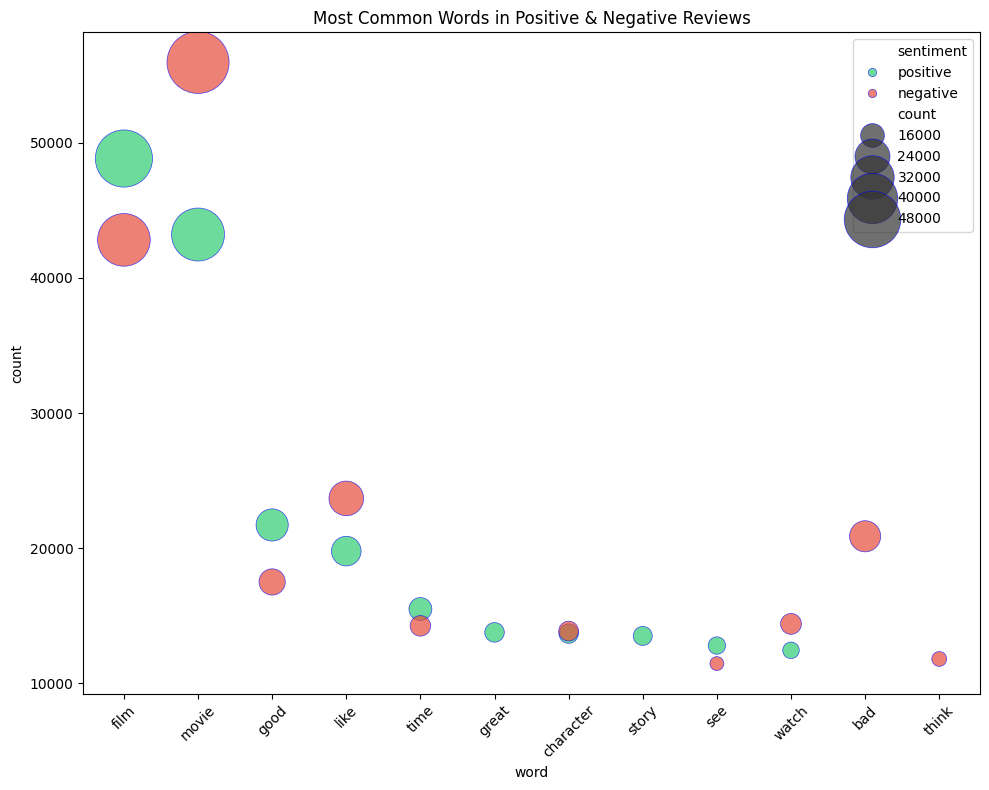

In [52]:
# Step 1: Get most common words
pos_common = Counter(pos_words).most_common(10)
neg_common = Counter(neg_words).most_common(10)

# Step 2: Convert to DataFrame
df_pos = pd.DataFrame(pos_common, columns=['word', 'count'])
df_pos['sentiment'] = 'positive'

df_neg = pd.DataFrame(neg_common, columns=['word', 'count'])
df_neg['sentiment'] = 'negative'

df_bubble = pd.concat([df_pos, df_neg], ignore_index=True)

# Step 3: Bubble chart
palette = {
    'positive': '#2ecc71', 
    'negative': '#e74c3c'   
}

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_bubble,
    x="word",
    y="count",
    size="count",
    hue="sentiment",
    sizes=(100, 2000),
    alpha=0.7,
    edgecolor="b",
    linewidth=0.5,
    palette= palette
)

plt.title("Most Common Words in Positive & Negative Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Modelling and vectorization

In [58]:
#makeing a copy of the original set to work on
imdb_model = imdb_cleaned.copy()

#feature variable
X = imdb_model["cleaned_review"]
#target variable
y = imdb_model["sentiment"]

#splitting the data into train and test sets'
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size = 0.2, random_state = 42, stratify= y)

In [60]:
#converting text using TF-IDF
tfidf = TfidfVectorizer(max_features = 5000, ngram_range= (1,2))
#fit on train data and transform
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [64]:
#training models and evaluation
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = []

    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, pos_label='positive')
        rec = recall_score(y_test, y_pred, pos_label='positive')
        f1 = f1_score(y_test, y_pred, pos_label='positive')

        results.append({
            "Model": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1 Score": f1
        })

        print(f"\n{name} Classification Report:")
        print(classification_report(y_test, y_pred))

    results_df = pd.DataFrame(results)
    return results_df


In [66]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results_df = train_and_evaluate(models, X_train_tfidf, X_test_tfidf, y_train, y_test)
print(results_df)


Training Logistic Regression...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4940
    positive       0.87      0.90      0.89      4977

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917

Training Naive Bayes...

Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.83      0.85      4940
    positive       0.84      0.87      0.85      4977

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917

Training Linear SVM...

Linear SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.88      0.88      4940
    positive       0.88      0.88      0.88

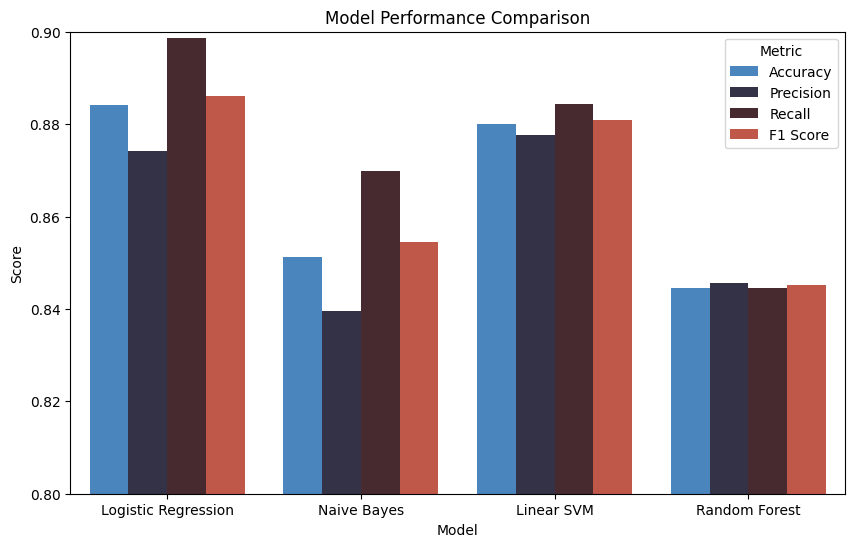

In [68]:
#model performance comparision
results_melted = results_df.melt(id_vars="Model", 
                                  value_vars=["Accuracy", "Precision", "Recall", "F1 Score"], 
                                  var_name="Metric", 
                                  value_name="Score")

plt.figure(figsize=(10,6))
sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric", palette="icefire")
plt.title("Model Performance Comparison")
plt.ylim(0.8, 0.9)  # zoom into range
plt.legend(title="Metric")
plt.show()

### Observations:
1. Logistic Regression achieved the highest accuracy (88.41%) and F1-score (0.886), making it the best-performing model overall.

2. Linear SVM performed almost as well as Logistic Regression (88.00% accuracy) with balanced precision and recall, showing strong generalization.

3. Naive Bayes achieved a slightly lower accuracy (85.13%) but still performed well given its simplicity and speed.

4. Random Forest had the lowest accuracy (84.46%), suggesting that tree-based models might not be as effective for this TF-IDF-based text classification task without further tuning.

5. Across all models, performance was balanced across positive and negative sentiment classes, indicating no major bias towards either class.

### Overall conclusions:
* Logistic Regression and Linear SVM are the top choices for this IMDB sentiment classification task.

* For production use, Logistic Regression is recommended due to its slightly better overall metrics and training efficiency.



### Saving the best model for deployment

In [71]:
best_model_name = results_df.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

# Save the model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print(f"✅ Best model '{best_model_name}' and TF-IDF vectorizer saved successfully!")

✅ Best model 'Logistic Regression' and TF-IDF vectorizer saved successfully!


In [72]:
# Load the model
with open("best_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Load the vectorizer
with open("tfidf_vectorizer.pkl", "rb") as f:
    loaded_vectorizer = pickle.load(f)

# Test with a sample review
sample_review = ["The movie was absolutely fantastic, I loved every moment!"]
sample_tfidf = loaded_vectorizer.transform(sample_review)
prediction = loaded_model.predict(sample_tfidf)

print("Prediction:", prediction[0])


Prediction: positive
